<a href="https://colab.research.google.com/github/PhoenixCC0722/Journey_to_become_DataScientist/blob/main/Chapter4_A/B_Test_2_central_limit_theorem_structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Central Limit Theorem
The Central Limit Theorem (CLT) is a fundamental concept in the field of statistics. It states that, regardless of the population distribution, as long as the sample size is sufficiently large, the distribution of the sample means will approximate a normal distribution. This powerful theorem is a cornerstone of statistical inference, enabling analysts and researchers to make robust inferences about a population based on the properties of sample data.

In this notebook, we'll explore each facet of the Central Limit Theorem. We'll delve into the process of sampling, calculating sample means, and understanding distributions. Then, we'll assemble these components to construct the distribution of sample means. This will show how the distribution of sample means closely approximates a normal distribution.


---
## 1.&nbsp; Import libraries 💾

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

---
## 2.&nbsp; Creating a population and taking samples 🧑‍🤝‍🧑
In this notebook, we require a population from which we can draw samples. Our chosen population consists of 100,000 randomly generated numbers ranging from one to one hundred. These numbers can be thought of as representing the ages of the population residing in WBS City.


In [2]:
population_list = []

for _ in range(100000):
  population_list.append(random.randint(1, 100))

Let's take a look at the first 10 numbers to verify they are random numbers between 1 and 100.

In [3]:
population_list[:10]

[41, 48, 3, 87, 89, 65, 9, 95, 49, 8]

Fantastic! Next, we'll convert this list into a pandas Series, allowing us to take advantage of the `.sample()` method.

In [4]:
population_series = pd.Series(population_list)

In this experiment, we intend to take numerous samples from our population and record the mean of each sample. To ensure that each sample has an equal opportunity, we must ensure that each sample is put back into the population rather than removed from it. By default, Pandas sets the `replace` parameter to `False`, which implies that once a sample is taken, it is removed from the population. With multiple samples, this would result in a progressively shrinking population. Our goal is for each sample to be drawn from the entire population, so we must adjust this parameter to `True`.


In [5]:
# While 20 is small for a sample size, we limit it to keep this notebook concise.
sample_size = 20

population_series.sample(n = sample_size, replace = True)

92788     7
56914    63
9199     29
61736    67
74541     4
33325    62
26930    42
6252     38
35148    59
67681    89
64959    84
34871     5
78911    36
25881    62
84592    53
62221    68
17187    69
33486    28
32312    54
4173      9
dtype: int64

The first column represents the indexes, while the second column contains the "ages," which are the random numbers we generated.

---
## 3.&nbsp; Sample means 🔍
When we talk about sample means, we're actually referring to the means of multiple samples (hence the plural 😉). Here's how it works: We start by taking a sample from our population, calculate the mean of that sample, and record it in a list. We then repeat this process, taking more samples from our population, calculating the means for each sample, and adding these means to our list.

Let's start by initialising an empty list where we'll store the means of the many samples we'll be collecting.

In [7]:
sample_means = []

Next, let's add our first sample mean to the list. We'll also increase the sample size - larger sample sizes tend to provide more accurate representations of the entire population.

In [13]:
# Increase sample_size
sample_size = 200

# Generate a random sample from the population_series.
first_sample = population_series.sample(n=sample_size, replace=True)

# Calculate the mean of the first_sample.
first_sample_mean = first_sample.mean()

# Append the mean of the first_sample to the 'sample_means' list.
sample_means.append(first_sample_mean)

# Display the updated 'sample_means' list.
sample_means

[54.705,
 50.23,
 48.23,
 48.46,
 49.69,
 51.66,
 52.91,
 48.455,
 50.88,
 49.525,
 52.5,
 49.52,
 51.355,
 52.36,
 50.49,
 50.295,
 49.97,
 49.7,
 50.225,
 51.43,
 51.99,
 50.215,
 50.885,
 53.28,
 52.405,
 47.69,
 51.23,
 53.555,
 52.03,
 48.88,
 53.06,
 48.55,
 49.845,
 55.445,
 54.055,
 49.01,
 50.265,
 51.615,
 52.77,
 54.21,
 52.2,
 50.965,
 52.325,
 49.565,
 49.87,
 48.295,
 48.675,
 48.57,
 52.905,
 49.07,
 46.89,
 54.095,
 52.79,
 48.81,
 48.74,
 50.34,
 47.04,
 51.93,
 52.05,
 50.355,
 47.6,
 52.085,
 49.99,
 50.665,
 50.64,
 49.96,
 51.17,
 52.62,
 51.3,
 52.05,
 53.515,
 51.91,
 50.47,
 51.795,
 47.9,
 50.39,
 53.29,
 50.61,
 53.515,
 51.77,
 54.075,
 50.04,
 49.765,
 49.74,
 46.94,
 53.04,
 50.17,
 53.65,
 50.175,
 47.44,
 50.85,
 50.275,
 50.375,
 49.54,
 49.46,
 49.195,
 52.955,
 46.615,
 50.935,
 50.665,
 54.755,
 48.275,
 50.21,
 48.11,
 51.705,
 52.855,
 47.445,
 49.55,
 49.555,
 52.07,
 47.49,
 49.88,
 51.935,
 50.615,
 49.425,
 51.265,
 53.375,
 51.5,
 50.43,
 55.42

### Challenge 1:
That was easy, right! Now our task is to replicate this process multiple times. We will repeatedly take samples, calculate their means, and store those means in our sample_means list. Utilise your understanding of for loops to add the means of 10,000 more samples to the sample_means list.


In [14]:
# initialising the empty list to store all the sample mean vlaues
sample_means = []
num_samples = 10000
# set the sample_size
sample_size = 200

for _ in range(num_samples):
  # Generate a random sample from the population_series.
  sample = population_series.sample(n=sample_size, replace=True)
  # Calculate the mean of the first_sample.
  sample_mean = sample.mean()
  # Append the mean of the first_sample to the 'sample_means' list.
  sample_means.append(sample_mean)

# Display the updated 'sample_means' list.
print(sample_means)
#pd.Series(sample_means).info()

[51.53, 52.75, 50.28, 49.62, 50.39, 48.445, 52.515, 49.88, 48.155, 51.84, 51.77, 48.825, 51.935, 49.27, 52.745, 49.635, 50.775, 48.595, 46.85, 53.505, 50.165, 50.495, 54.575, 54.915, 50.65, 53.72, 52.68, 52.42, 50.25, 51.18, 48.695, 52.275, 53.885, 47.245, 50.56, 54.065, 52.455, 49.765, 48.38, 52.185, 52.515, 49.59, 49.915, 50.95, 49.58, 52.4, 51.225, 50.07, 51.98, 49.51, 50.1, 49.275, 49.9, 52.395, 52.64, 53.785, 53.61, 51.325, 51.79, 50.46, 52.785, 49.045, 52.975, 53.42, 47.89, 48.015, 51.71, 48.855, 50.265, 54.815, 48.91, 53.625, 49.36, 48.505, 49.845, 44.29, 51.475, 54.065, 51.38, 51.145, 47.99, 50.265, 48.535, 53.04, 51.855, 51.5, 55.13, 54.165, 51.22, 49.57, 52.075, 55.52, 49.36, 49.52, 50.64, 46.83, 50.895, 49.225, 46.965, 52.885, 51.17, 51.985, 51.54, 53.585, 50.93, 47.18, 48.105, 49.69, 53.91, 54.23, 52.3, 50.81, 50.18, 50.53, 50.36, 52.96, 54.955, 50.56, 45.97, 50.465, 47.18, 50.015, 50.43, 50.895, 50.555, 52.1, 50.815, 50.46, 46.445, 51.75, 52.175, 48.425, 55.97, 50.68, 50.9

---
## 4.&nbsp; Distribution 📊
Distributions are graphical or mathematical representations that illustrate how data points are spread across a dataset. These representations enable us to comprehend the frequency and positioning of data within the dataset, shedding light on the likelihood of encountering specific values or events.

We've actually come across visual distributions before, although you might not have recognised them as such. Histograms are an example of distributions. They display values on the x-axis and the frequency of each value on the y-axis.

Let's look at the distribution of ages in our population_series.

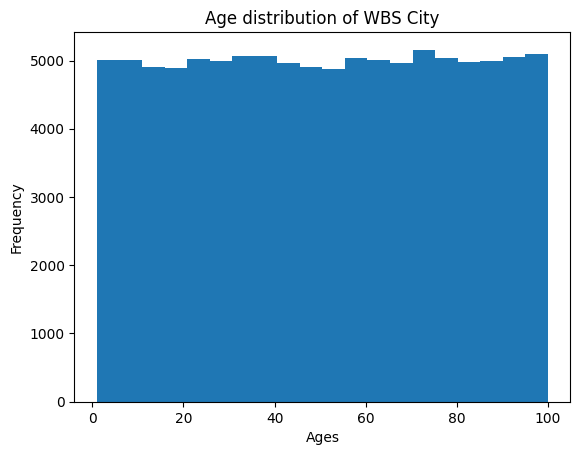

In [15]:
# Create the histogram using Matplotlib
plt.hist(population_series, bins=20)  # Added 'bins' for better granularity.

# Add a title and axis labels
plt.title("Age distribution of WBS City")
plt.xlabel("Ages")
plt.ylabel("Frequency")

# Show the histogram
plt.show()

The observed distribution may appear somewhat uniform and lacking excitement, which is not unexpected. We specifically requested 100,000 random numbers falling between 1 and 100. Given that each number has an equal probability of being selected, over the course of 100,000 selections, each value has been chosen nearly an equal number of times. This aligns with the law of large numbers.

We can also explore the distribution of our 10,001 sample means by plotting a histogram.

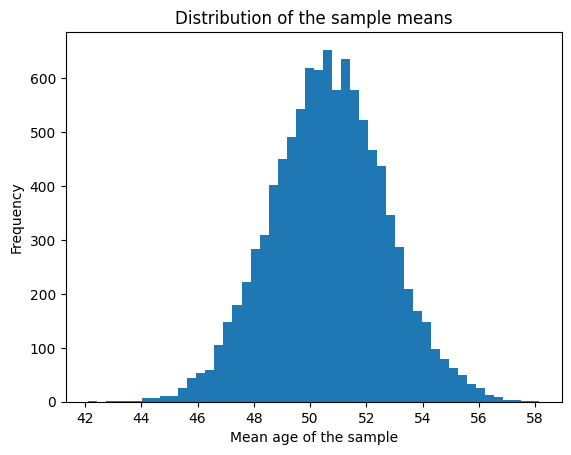

In [16]:
# Create the histogram using Matplotlib
plt.hist(sample_means, bins=50)  # Added 'bins' for better granularity.

# Add a title and axis labels
plt.title("Distribution of the sample means")
plt.xlabel("Mean age of the sample")
plt.ylabel("Frequency")

# Show the histogram
plt.show()

This is promising. The distribution of our sample means appears to be approximating a normal distribution - the bell-shaped curve. This aligns with the fundamental insight of the Central Limit Theorem; regardless of the population distribution, as long as the sample size is sufficiently large, the distribution of the sample means will tend to approximate a normal distribution.

And that's it, that's the Central Limit Theorem - when we take many samples, calculate the means of those samples, and plot the distribution of those sample means, we end up with an approximation of the normal distribution.


---
## 5.&nbsp; Challenges 😃

### Challenge 2:

Here is the code we used to generate the distribution of sample means. To observe the effects of changing these variables, modify one variable at a time and observe the outcomes.

- **Sample Size:** Adjust the size of individual samples.
- **Number of Samples:** Alter the quantity of samples taken.

Increasing the number of samples taken indeed tends to make the distribution more closely resemble a normal distribution. This observation aligns with the [Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers). Additionally, larger sample sizes result in smaller margins of error and reduced standard deviation, leading to more precise estimates of population parameters.

By systematically adjusting these variables and observing the resulting distribution, you can gain valuable insights into the impact of sample size and sample quantity on the accuracy of statistical estimates.


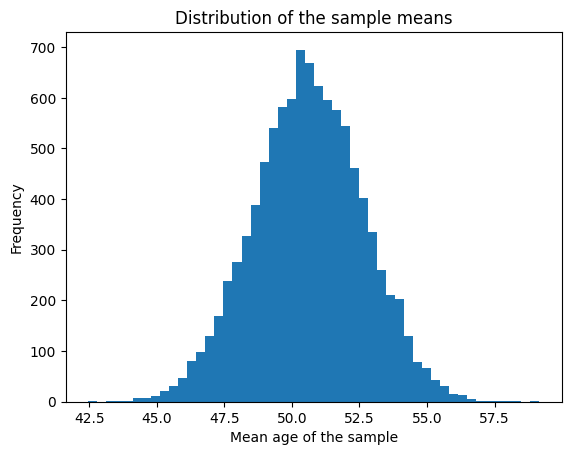

In [17]:
num_samples = 10000
sample_size = 200

sample_means = []

for _ in range(num_samples):
    sample = population_series.sample(n=sample_size, replace=True)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

plt.hist(sample_means, bins=50)
plt.title("Distribution of the sample means")
plt.xlabel("Mean age of the sample")
plt.ylabel("Frequency")
plt.show()

### Challenge 3:

In this challenge, we will change from the flat and unexciting age distribution of WBS City and explore a bimodal distribution with two distinct peaks. Your task is to perform the experiment again. Follow these steps:

1. Start with the array `ages`, which we've created in the code below for you. These are the ages of the citizens of WBS City 2, as shown in the histogram below.

2. Start the experiment by taking a sample of 250 people from `ages`, calculating the samples mean, and storing this mean in a list.

3. Utilise your for loop skills to repeat the process by taking 30,000 more sample means, and appending them to your list.

4. Finally, create a histogram of your list of sample means and examine the resulting distribution. Does the distribution of sample means for this new and different population also approximate the normal distribution?


# 1. Start with the array ages, which we've created in the code below for you. These are the ages of the citizens of WBS City 2, as shown in the histogram below.

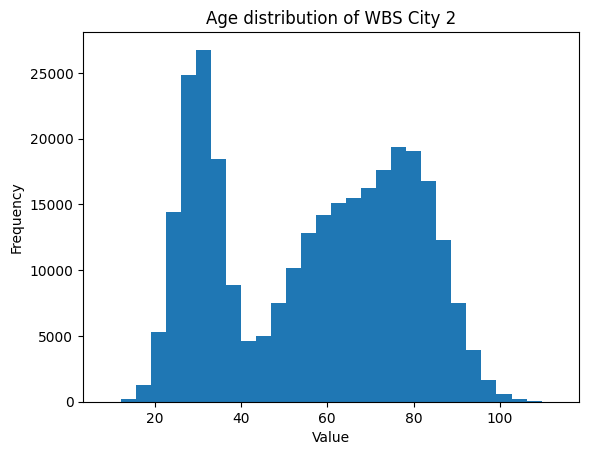

In [18]:
# Set the number of data points
num_points = 100000

# Define the parameters for each mode (mean and standard deviation)
modes = [
    {'mean': 30, 'std_dev': 5},
    {'mean': 60, 'std_dev': 10},
    {'mean': 80, 'std_dev': 8}
]

# Generate random numbers for each mode and concatenate them
ages = np.concatenate([np.random.normal(mode['mean'], mode['std_dev'], num_points) for mode in modes])

# Create a histogram to visualise the distribution
plt.hist(ages, bins=30)
plt.title("Age distribution of WBS City 2")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# 2. Start the experiment by taking a sample of 250 people from ages, calculating the samples mean, and storing this mean in a list.

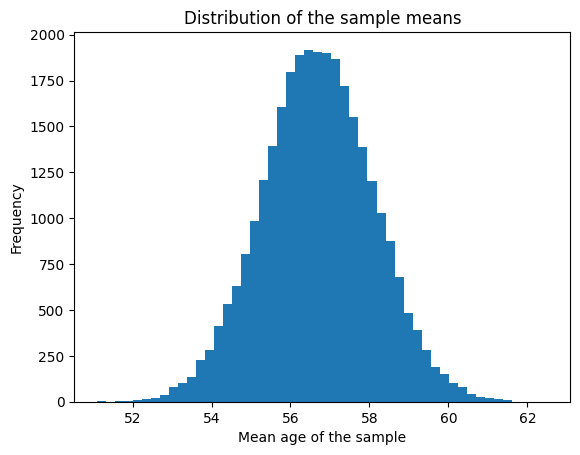

In [22]:
# create series from the age array
ages_series = pd.Series(ages)

#define the number of samples and the size
sample_size = 250
num_samples = 30000
sample_means = []

for _ in range(num_samples):
    sample = ages_series.sample(n=sample_size, replace=True)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

plt.hist(sample_means, bins=50)
plt.title("Distribution of the sample means")
plt.xlabel("Mean age of the sample")
plt.ylabel("Frequency")
plt.show()

# 3. Utilise your for loop skills to repeat the process by taking 30,000 more sample means, and appending them to your list.

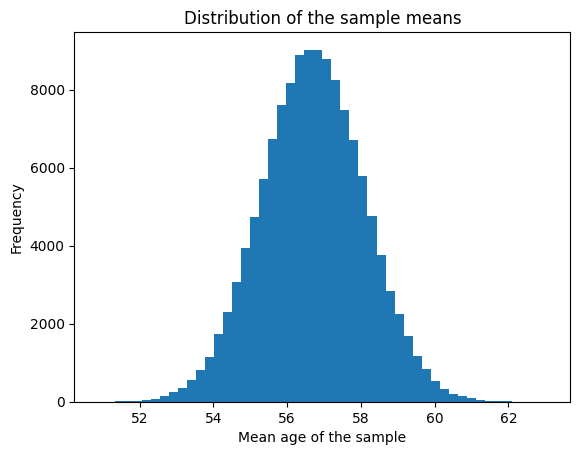

In [23]:
# create series from the age array
ages_series = pd.Series(ages)

num_samples = 130000
sample_size = 250

sample_means = []

for _ in range(num_samples):
    sample = ages_series.sample(n=sample_size, replace=True)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

plt.hist(sample_means, bins=50)
plt.title("Distribution of the sample means")
plt.xlabel("Mean age of the sample")
plt.ylabel("Frequency")
plt.show()

# 4. Finally, create a histogram of your list of sample means and examine the resulting distribution. Does the distribution of sample means for this new and different population also approximate the normal distribution?